## Introduction to Neural networks with CNNs

In [1]:
# import image preoccesing libraries 

import matplotlib.pyplot as plt
import matplotlib.image as pltimg

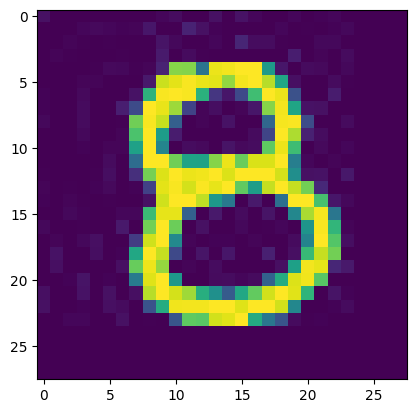

In [2]:
# display an image 
image=pltimg.imread("/kaggle/input/mnistasjpg/trainingSet/trainingSet/8/img_10024.jpg")
plt.imshow(image)

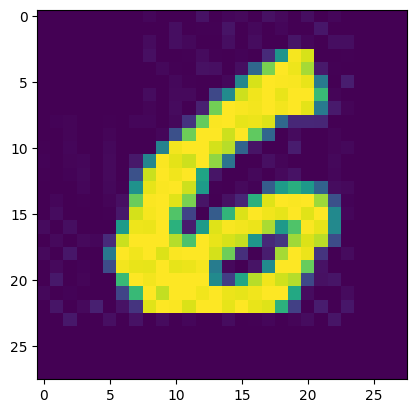

In [3]:
# another image example 
image_2=pltimg.imread("/kaggle/input/mnistasjpg/trainingSet/trainingSet/6/img_10294.jpg")
plt.imshow(image_2)

In [4]:
# display shape of 
image_2.shape

(28, 28)

In [5]:
# ! pip install tensorflow
# ! pip install tensorflow

In [6]:
# tensfolow imports 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generating Data From images

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator
```

Key Parameters of ImageDataGenerator

    featurewise_center:
        Type: bool
        Default: False
        Description: If set to True, it will center the data by subtracting the mean of the dataset. This helps in normalizing the input.
        Importance: Useful for ensuring that the data has a mean of zero, which can improve convergence during training.

    featurewise_std_normalization:
        Type: bool
        Default: False
        Description: If True, it divides the data by the standard deviation of the dataset.
        Importance: This further normalizes the data, making it more suitable for training neural networks.

    rescale:
        Type: float
        Default: None
        Description: Rescales the pixel values to a different range, often used to normalize pixel values (e.g., 1./255 to convert from [0, 255] to [0, 1]).
        Importance: Ensures that input values are in a suitable range for training, which can lead to better performance.

    zca_whitening:
        Type: bool
        Default: False
        Description: If True, applies ZCA whitening to the data.
        Importance: This can help reduce redundancy in features and improve model performance, although it may increase training time.

    rotation_range:
        Type: int
        Default: 0
        Description: Degree range for random rotations.
        Importance: Helps the model become invariant to rotations of the object, which is beneficial for image classification tasks.

    width_shift_range and height_shift_range:
        Type: float or int
        Default: 0.0
        Description: Fraction or absolute pixels to shift the image horizontally or vertically.
        Importance: Allows the model to learn to recognize objects in different positions within the image.

    shear_range:
        Type: float
        Default: 0.0
        Description: Shear angle in counter-clockwise direction in degrees.
        Importance: Helps the model learn to recognize objects that may be distorted.

    zoom_range:
        Type: float or [float, float]
        Default: 0.0
        Description: Range for random zoom.
        Importance: Enhances the model’s ability to recognize objects at different scales.

    horizontal_flip:
        Type: bool
        Default: False
        Description: Randomly flip inputs horizontally.
        Importance: Useful for certain datasets (e.g., faces) where the orientation of the image matters less.

    vertical_flip:
        Type: bool
        Default: False
        Description: Randomly flip inputs vertically.
        Importance: Similar to horizontal flip but used less frequently unless the context allows for it (e.g., certain types of animals).

    fill_mode:
        Type: str
        Default: 'nearest'
        Description: Points outside the boundaries of the input are filled according to the given mode.
        Importance: Determines how to fill in the new pixels when transformations (like shifting or rotating) are applied.

    validation_split:
        Type: float
        Default: 0.0
        Description: Proportion of the dataset to reserve for validation.
        Importance: Useful for automatically splitting your dataset into training and validation sets without needing to manually preprocess the data.

In [7]:
# image data generator 

# datagen  =  ImageDataGenerator(
    # optional parameters
    # rescale=1.0/255,            # Normalize pixel values to [0, 1]
    # rotation_range=40,          # Randomly rotate images
    # width_shift_range=0.2,      # Randomly shift images horizontally
    # height_shift_range=0.2,     # Randomly shift images vertically
    # shear_range=0.2,            # Randomly shear images
    # zoom_range=0.2,             # Randomly zoom images
    # horizontal_flip=True,        # Randomly flip images
    # fill_mode='nearest',
    # validation_split = 0.2
# )

In [8]:
# data generator
datagen=ImageDataGenerator(
    rescale=1.0/255,            # Normalize pixel values to [0, 1]
    rotation_range=40,          # Randomly rotate images
    width_shift_range=0.2,      # Randomly shift images horizontally
    height_shift_range=0.2,     # Randomly shift images vertically
    shear_range=0.2,            # Randomly shear images
    zoom_range=0.2,             # Randomly zoom images
    horizontal_flip=True,        # Randomly flip images
    fill_mode='nearest',
    validation_split = 0.2

)


In [9]:
# define data source 
folder="/kaggle/input/mnistasjpg/trainingSet/trainingSet"

## Using Flow from Directory

Important Parameters

    directory:
        Type: str
        Description: Path to the target directory containing subdirectories for each class.

    target_size:
        Type: (int, int)
        Description: The dimensions to which all images found will be resized.
        Importance: Ensures that all images have the same dimensions, which is necessary for feeding them into a neural network.

    batch_size:
        Type: int
        Description: The number of samples to be yielded from the generator per iteration.
        Importance: Affects the number of images processed at once, which can impact training speed and memory usage.

    class_mode:
        Type: str
        Description: Determines the type of label arrays that are returned:
            'categorical' for one-hot encoded labels,
            'binary' for binary labels,
            'sparse' for integer labels,
            None for no labels (useful for feature extraction).
        Importance: This is crucial for ensuring that your labels are formatted correctly for your specific task.

    shuffle:
        Type: bool
        Default: True
        Description: Whether to shuffle the data.
        Importance: Shuffling can help the model learn more effectively by preventing it from seeing the data in a fixed order.

    seed:
        Type: int
        Description: Random seed for shuffling and transformations.
        Importance: Useful for reproducibility of results.

    subset:
        Type: str
        Options: 'training' or 'validation'
        Description: If the validation_split parameter is set, this indicates whether to return the training or validation data.
        Importance: Allows for automatic splitting of the dataset into training and validation sets based on the defined split.
        
    color_mode:
        specifies the color format of the images being loaded
        Options:
            "grayscale": Loads images as grayscale. The resulting images will have a single channel.
            "rgb": Loads images in RGB format (the default). The resulting images will have three channels, representing red, green, and blue.
            "rgba": Loads images in RGBA format, which includes an additional alpha channel for transparency (if applicable). This option is less common in standard classification tasks.

In [10]:
# training_data = datagen.flow_from_directory(
    # folder,
    # target_size=(28,28),
    # batch_size = 32,
    # class_mode = 'categorical',
    # color_mode = 'grayscale',
    # seed = 42,
    # subset="training"
# )


In [11]:
training_data = datagen.flow_from_directory(
    folder,
    target_size=(28,28),
    batch_size = 32,
    class_mode = 'categorical',
    color_mode = 'grayscale',
    seed = 42,
    subset="training"
)


Found 33604 images belonging to 10 classes.


In [12]:
validation = datagen.flow_from_directory(
    folder,
    target_size=(28,28),
    class_mode = "categorical",
    color_mode = "grayscale",
    subset = "validation"
)

Found 8396 images belonging to 10 classes.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,Input,BatchNormalization

# These layers are fundamental building blocks for constructing convolutional neural networks
1. Conv2D

        Purpose: Convolutional layer that applies a number of filters to the input data.
        Usage: Commonly used in convolutional neural networks (CNNs) for image processing tasks.
        Parameters:
            filters: Number of output filters (feature maps).
            kernel_size: Size of the convolutional kernel (filter). Can be a single integer (for square kernels) or a tuple for different height and width.
            strides: The step size for moving the filter across the input. Default is (1, 1).
            padding: Can be 'valid' (no padding) or 'same' (padding added to keep the same input shape).
            activation: Activation function applied to the output (e.g., 'relu').
        Importance: Helps the network learn spatial hierarchies of features, making it suitable for image data.


2. Dense

        Purpose: Fully connected layer that connects every input to every output.
        Usage: Typically used in the final layers of a model for classification tasks.
        Parameters:
            units: Number of neurons in the layer.
            activation: Activation function (e.g., 'relu', 'softmax' for multi-class classification).
        Importance: Combines features learned by previous layers and outputs predictions.


3. Flatten

        Purpose: Converts the multi-dimensional input (e.g., from a Conv2D layer) into a one-dimensional array.
        Usage: Used before the Dense layers to prepare data for a fully connected network.
        Importance: Essential for transitioning from convolutional layers to fully connected layers by reshaping the data.


4. MaxPooling2D

        Purpose: Downsamples the input by taking the maximum value over a specified window (pooling region).
        Usage: Reduces the spatial dimensions (width and height) of the input, retaining the most important features.
        Parameters:
            pool_size: Size of the pooling window (e.g., (2, 2)).
            strides: Step size for moving the pooling window. If not specified, defaults to pool_size.
            padding: Can be 'valid' or 'same'.
        Importance: Helps reduce overfitting, decrease computational load, and extract dominant features.


5. Dropout

        Purpose: Regularization layer that randomly sets a fraction of input units to zero during training.
        Usage: Used to prevent overfitting by making the network more robust.
        Parameters:
            rate: Fraction of the input units to drop (e.g., 0.5 means dropping half of the units).
        Importance: Encourages the network to learn more robust features by preventing reliance on specific neurons.

6. Input

        Purpose: Defines the shape of the input data for the model.
        Usage: Used as the first layer in a Sequential model or as part of a functional API.
        Parameters:
            shape: A tuple representing the input shape (excluding the batch size). For example, (height, width, channels).
        Importance: Establishes the expected input shape and allows for error-checking during model creation.


7. BatchNormalization

        Purpose: Normalizes the activations of the previous layer at each batch, stabilizing the learning process.
        Usage: Typically placed after a Conv2D or Dense layer and before the activation function.
        Parameters:
            momentum: Momentum for the moving average of the mean and variance.
            epsilon: Small constant added to the variance to avoid division by zero.
        Importance: Helps improve training speed and stability, can allow for higher learning rates, and may reduce the need for other forms of regularization.

In [14]:
model=Sequential()

In [15]:
# Building  the model 
model.add(Input(shape=(28,28,1)))

# hidden layers
model.add(Conv2D(32,(3,3), activation="relu"))
model.add(Conv2D(64,(3,3), activation="relu"))
model.add(Conv2D(64,(3,3), activation="relu"))
model.add(Conv2D(128,(3,3), activation="relu"))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(64))
model.add(Dense(16, activation="relu"))
model.add(Dense(10,activation="softmax"))
model.add(Dropout(0.2)) 

# tabular data
# model.add(Input(shape=(df.shape[1])))
# model.add(Dropout(0.2)) # add to prevent overfitting
# model.add(Dense(256))
# model.add(Dense(64))
# model.add(Dense(32))
# model.add(Dense(10, activation="softmax"))

# Example with batch normalization
# model.add(tf.keras.layers.Conv2D(32, (3, 3), activation=None, input_shape=(150, 150, 3)))
# model.add(BatchNormalization())
# model.add(tf.keras.layers.Activation('relu'))
# model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


Activation functions play a crucial role in neural networks by introducing non-linearity, enabling the model to learn complex patterns

1. Sigmoid

        Range: (0, 1)

        Usage: Often used in binary classification tasks.\

        Characteristics:
            Output values are always between 0 and 1.
            Can suffer from the vanishing gradient problem, especially in deep networks.

2. Tanh (Hyperbolic Tangent)

    
        Range: (-1, 1)

        Usage: Used in hidden layers of neural networks.

        Characteristics:
            Centers the data around zero, which can help with convergence.
            Still suffers from the vanishing gradient problem but is generally better than sigmoid.

3. ReLU (Rectified Linear Unit)
 
        Range: (0, ∞)

        Usage: Commonly used in hidden layers of deep networks.

        Characteristics:
            Computationally efficient and mitigates the vanishing gradient problem.
            Can suffer from the dying ReLU problem, where neurons can become inactive.

4. Leaky ReLU


        Range: (-∞, ∞)

        Usage: A variant of ReLU to address the dying ReLU problem.

        Characteristics:
            Allows a small, non-zero gradient when the input is negative.
            

5. Parametric ReLU (PReLU)


        Usage: Helps mitigate the dying ReLU issue with flexibility.

        Characteristics:
                Provides a more adaptable approach by learning the slope of negative inputs.



6. Exponential Linear Unit (ELU)

        Range: (-α, ∞)

        Usage: Used in hidden layers to provide smoother outputs.

        Characteristics: 
                 Helps avoid the vanishing gradient problem and allows negative outputs.



7. Softmax

        Range: (0, 1) for each output, and the sum of outputs equals 1.

        Usage: Used in the output layer of multi-class classification tasks.

        Characteristics:
            Converts logits (raw scores) into probabilities.

8. Swish

        Range: (-∞, ∞)

        Usage: Proposed by Google as a more effective alternative to ReLU in some contexts.

        Characteristics:
                Non-monotonic and can provide better performance in some deep learning models.



9. GELU (Gaussian Error Linear Unit)

        Usage: Used in transformer models like BERT.

        Characteristics:
                Combines properties of ReLU and dropout, leading to potentially better performance.



In [16]:
# compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy","precision"]
)

# Optmizers
An optimizer is an algorithm used to adjust the weights of the neural network based on the loss function's gradient.


Adam (Adaptive Moment Estimation):

    Description: Combines the advantages of two other popular optimizers: AdaGrad (which works well with sparse gradients) and RMSProp (which works well in non-stationary settings).
    Features:
        Maintains a moving average of both the gradients and the squared gradients.
        Adapts the learning rate for each parameter, improving convergence speed.
    Usage: optimizer='adam' is a default choice in many applications due to its efficiency and good performance across various tasks.

SGD (Stochastic Gradient Descent):

    Description: The basic form of the gradient descent algorithm. It updates parameters using a small batch of data rather than the entire dataset.
    Features:
        Simple to implement.
        Can include momentum to improve convergence.
    Usage: Often used for its simplicity but may require more tuning of the learning rate.

RMSProp:

    Description: An adaptive learning rate optimizer that adjusts the learning rate for each parameter based on the average of recent gradients.
    Features:
        Particularly effective for recurrent neural networks and other tasks with noisy gradients.
    Usage: Good for non-stationary objectives.

Adagrad:

    Description: Adapts the learning rate for each parameter based on how frequently they're updated.
    Features:
        Works well for sparse data but can lead to a rapid decay of the learning rate.
    Usage: Not as commonly used as Adam or RMSProp for most tasks.

Nadam:

    Description: Combines Adam with Nesterov momentum, which can lead to better convergence.
    Usage: Useful for many deep learning tasks.

# Loss function

The loss function quantifies how well the model's predictions match the actual data

Binary Crossentropy

    Usage: Used for binary classification tasks.

    Characteristics: Measures the dissimilarity between predicted probabilities and true binary labels.

Sparse Categorical Crossentropy

    Usage: Similar to categorical crossentropy but used when the labels are integers rather than one-hot encoded vectors.
    Characteristics: Efficient for multi-class classification tasks with integer labels.

Mean Squared Error (MSE)

    Usage: Commonly used for regression tasks.
    Characteristics: Measures the average squared difference between predicted values and actual values.

Mean Absolute Error (MAE)

    Usage: Also used for regression tasks.
    Characteristics: Measures the average absolute difference between predicted values and actual values. Less sensitive to outliers than MSE.
Categorical Crossentropy:

    Usage: Commonly used for multi-class classification tasks where classes are one-hot encoded.
    Characteristics: Measures the dissimilarity between the predicted probability distribution and the true distribution.
Huber Loss

    Usage: A combination of MSE and MAE, used for regression tasks.
    Characteristics: Less sensitive to outliers than MSE. It behaves like MSE when the error is small and like MAE when the error is large.


# Metrics

Metrics are used to evaluate the performance of the model during training and testing. The metric you mentioned is:

    Accuracy:
        characteristic : The ratio of correctly predicted instances to the total instances.
        Usage: A straightforward metric for classification problems. It gives a quick idea of model perfomance
        
    Precision

        Usage: Measures the accuracy of positive predictions.
        Characteristics: Important in cases where false positives are costly.

    Recall (Sensitivity)

        Usage: Measures the ability of a model to find all relevant cases (true positives).

        Characteristics: Important in cases where missing a positive instance is costly.

    F1 Score

        Usage: Harmonic mean of precision and recall, useful for imbalanced datasets.

        Characteristics: Balances precision and recall, providing a single metric to evaluate performance.

    AUC-ROC (Area Under the Receiver Operating Characteristic Curve)

        Usage: Measures the ability of the model to distinguish between classes.
        
        Characteristics: AUC provides a single value representing the model's performance across all classification thresholds.

    Top-k Accuracy

        Usage: Used in multi-class classification where you want to know if the true label is within the top k predictions.
        Characteristics: Particularly useful in problems with a large number of classes (e.g., image classification).

In [17]:
# show model structer
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 22, 22, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     1,638,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           170 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,771,354 (6.76 MB)

 Trainable params: 1,771,354 (6.76 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Train the model 
model.fit(training_data,epochs=20, batch_size=32, validation_data=validation)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1051/1051 ━━━━━━━━━━━━━━━━━━━━ 280s 262ms/step - accuracy: 0.2832 - loss: 4.5285 - precision: 0.6337 - val_accuracy: 0.6928 - val_loss: 0.9212 - val_precision: 0.8002
Epoch 2/20
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 167s 159ms/step - accuracy: 0.6147 - loss: 3.7628 - precision: 0.7760 - val_accuracy: 0.7918 - val_loss: 0.6338 - val_precision: 0.8411
Epoch 3/20
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 167s 158ms/step - accuracy: 0.6659 - loss: 3.6844 - precision: 0.8227 - val_accuracy: 0.8359 - val_loss: 0.4828 - val_precision: 0.8725
Epoch 4/20
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 165s 157ms/step - accuracy: 0.6970 - loss: 3.5021 - precision: 0.8515 - val_accuracy: 0.8378 - val_loss: 0.4917 - val_precision: 0.8734
Epoch 5/20
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 164s 156ms/step - accuracy: 0.7148 - loss: 3.3881 - precision: 0.8677 - val_accuracy: 0.8790 - val_loss: 0.3656 - val_precision: 0.9079
Epoch 6/20
1051/1051 ━━━━━━━━━━━━━━━━━━━━ 163s 155ms/step - accuracy: 0.7182 - loss: 3.4686 - precision: 0.8810 - val_acc